In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split as tts,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,make_scorer,f1_score,r2_score,mean_absolute_error

In [3]:
titanic=pd.read_csv('/content/drive/MyDrive/Data_PRML/titanic.csv')

In [4]:
titanic.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [6]:
#Deleting name,cabin column
del titanic['Cabin']
del titanic['Name']

In [7]:
del titanic['Ticket']

In [8]:
cat_feature=list(titanic.select_dtypes(include=['object']).columns)
for feature in cat_feature:
  main_val=list(titanic[feature].unique())
  for val in main_val:
    titanic.loc[titanic[feature]==val,feature]=main_val.index(val)
titanic.head()    

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived
0,1,3,0,22.0,7.2500,0,0
1,2,1,1,38.0,71.2833,1,1
2,3,3,1,26.0,7.9250,0,1
3,4,1,1,35.0,53.1000,0,1
4,5,3,0,35.0,8.0500,0,0


In [9]:
user_prompt = 0.3
user_enable = True
X=titanic['Survived']
Y=titanic[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]
X_train,X_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

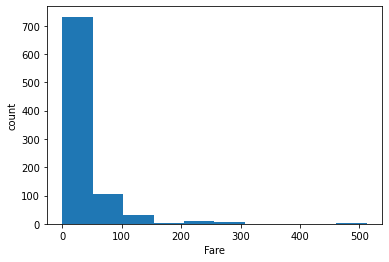

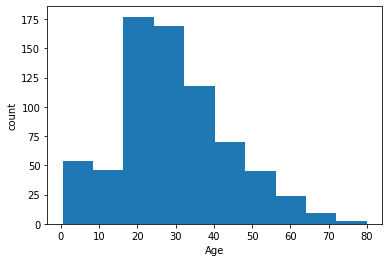

In [10]:
x=titanic['Fare']
plt.hist(x)
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()
x=titanic['Age']
plt.hist(x)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()


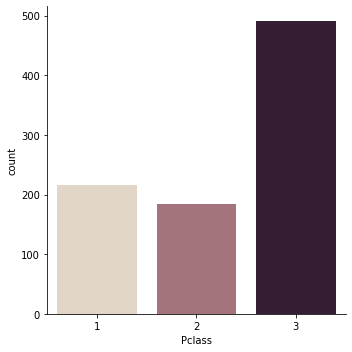

In [11]:
sns.catplot(x="Pclass", kind="count", palette="ch:.25", data=titanic)

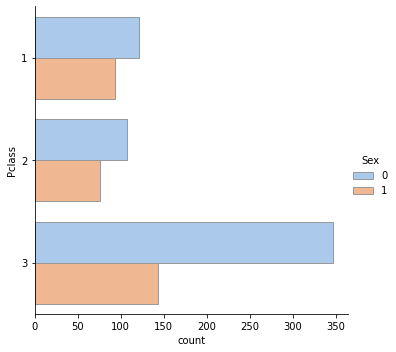

In [12]:
sns.catplot(y="Pclass", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

In [13]:
x1=titanic.loc[(titanic['Survived']==0),'Fare']
x2=titanic.loc[(titanic['Survived']==1),'Fare']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


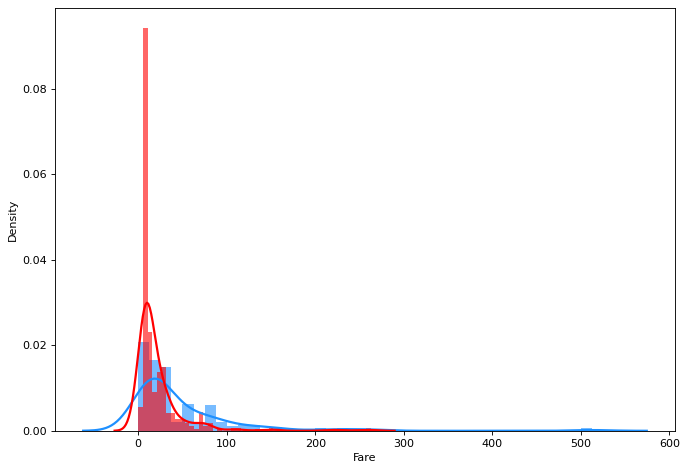

In [14]:
plt.figure(figsize=(10,7), dpi= 80)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(x2,color='dodgerblue',label='Live',**kwargs)
sns.distplot(x1,color='red',label='Dead',**kwargs)

In [15]:
x1=titanic.loc[(titanic['Survived']==0),'Age']
x2=titanic.loc[(titanic['Survived']==1),'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


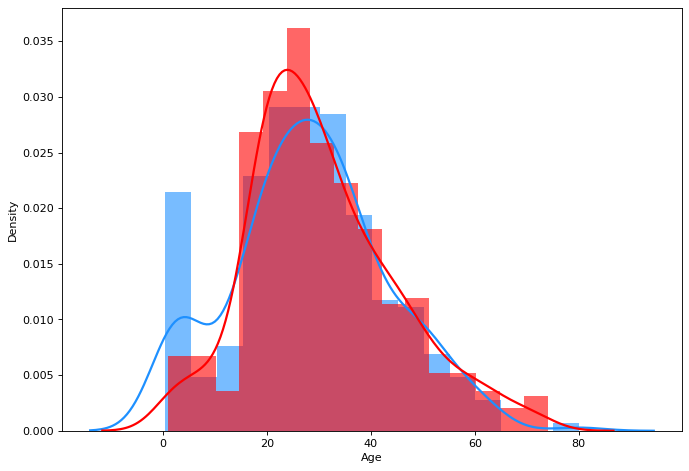

In [16]:
plt.figure(figsize=(10,7), dpi= 80)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(x2,color='dodgerblue',label='Live',**kwargs)
sns.distplot(x1,color='red',label='Dead',**kwargs)

In [17]:
titanic.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000
